Ari Zaman Midterm Project 1 

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


File that contains ID info

In [311]:
df1 = pd.read_csv('/vol_fast/ecen489/smart-meters-in-london/informations_households.csv')

In [312]:
df1.sort_values(by='Acorn')

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
102,MAC002260,Std,ACORN-A,Affluent,block_2
103,MAC004554,Std,ACORN-A,Affluent,block_2
104,MAC003683,Std,ACORN-A,Affluent,block_2
...,...,...,...,...,...
5536,MAC005036,Std,ACORN-U,ACORN-U,block_110
5537,MAC004067,Std,ACORN-U,ACORN-U,block_110
5538,MAC003619,Std,ACORN-U,ACORN-U,block_110
5527,MAC003328,Std,ACORN-U,ACORN-U,block_110


Sorting by Acorn Groups
After going through the data I decided to create a dicitonary that contained each group A-Q. The keys for these letter values was also a dictionary which I would sort by ACORN group and daily usage.

Creating a dicitonary with letter keys and dictionary values.

In [380]:
groups = {'A':{}, 'B':{},'C':{},'D':{},'E':{},'F':{},'G':{},'H':{},'I':{},'J':{},'K':{},'L':{},'M':{},'N':{},'O':{},'P':{},'Q':{}}

Putting LCLid in dictionary by ACRON group.

In [381]:
for group in groups:
    temp = df1[df1['Acorn'] == ('ACORN-' + group)]
    groups[group]['households'] = temp

File that contains LCLid daily usage

In [384]:
df2 = pd.read_csv('/vol_fast/ecen489/smart-meters-in-london/daily_dataset.csv')

In [385]:
df2

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066
...,...,...,...,...,...,...,...,...,...
3510428,MAC004977,2014-02-24,0.0950,0.118458,0.580,48,0.093814,5.686,0.052
3510429,MAC004977,2014-02-25,0.0675,0.084208,0.176,48,0.037107,4.042,0.046
3510430,MAC004977,2014-02-26,0.1080,0.120500,0.282,48,0.069332,5.784,0.046
3510431,MAC004977,2014-02-27,0.0720,0.114062,0.431,48,0.094482,5.475,0.047


Adding daily usage key and info to groups dictionary

In [418]:
for group in groups:
    i = 0
    for id in groups[group]['households']['LCLid']:
        print (group, id)
        if i == 0:
            temp = df2[df2['LCLid'] == id]
        else:
            df2[df2['LCLid'] == id].append(temp, sort=False)
    groups[group]['daily'] = temp

A MAC000002
A MAC003613
A MAC003597
A MAC003579
A MAC003566
A MAC003557
A MAC003553
A MAC003482
A MAC003463
A MAC003449
A MAC003428
A MAC003423
A MAC003422
A MAC003400
A MAC003394
A MAC003388
A MAC003348
A MAC000246
A MAC003305
A MAC003281
A MAC003252
A MAC003239
A MAC003646
A MAC003656
A MAC003668
A MAC003680
A MAC004431
A MAC004387
A MAC004319
A MAC004247
A MAC004179
A MAC004034
A MAC003874
A MAC003863
A MAC003856
A MAC003851
A MAC003223
A MAC003844
A MAC003826
A MAC003817
A MAC003805
A MAC003775
A MAC003740
A MAC003737
A MAC003719
A MAC003718
A MAC003686
A MAC000450
A MAC003840
A MAC003212
A MAC003182
A MAC003166
A MAC001628
A MAC001533
A MAC001528
A MAC001510
A MAC001271
A MAC001251
A MAC001239
A MAC001145
A MAC000974
A MAC000948
A MAC001689
A MAC000902
A MAC000850
A MAC000816
A MAC000778
A MAC000379
A MAC000768
A MAC000713
A MAC000386
A MAC000569
A MAC000557
A MAC000535
A MAC000886
A MAC004529
A MAC001710
A MAC001776
A MAC003110
A MAC003072
A MAC002937
A MAC002924
A MAC002813
A MA

Plot of ACORN group vs. Daily Usage

In [419]:
groups

{'A': {'households':          LCLid stdorToU    Acorn Acorn_grouped     file
  2    MAC000002      Std  ACORN-A      Affluent  block_0
  3    MAC003613      Std  ACORN-A      Affluent  block_0
  4    MAC003597      Std  ACORN-A      Affluent  block_0
  5    MAC003579      Std  ACORN-A      Affluent  block_0
  6    MAC003566      Std  ACORN-A      Affluent  block_0
  ..         ...      ...      ...           ...      ...
  154  MAC005159      ToU  ACORN-A      Affluent  block_3
  155  MAC004543      ToU  ACORN-A      Affluent  block_3
  156  MAC003211      ToU  ACORN-A      Affluent  block_3
  157  MAC003221      ToU  ACORN-A      Affluent  block_3
  158  MAC004832      ToU  ACORN-A      Affluent  block_3
  
  [157 rows x 5 columns],
  'daily':              LCLid         day  energy_median  energy_mean  energy_max  \
  1509469  MAC004832  2012-04-10         0.1910     0.259871       0.846   
  1509470  MAC004832  2012-04-11         0.1585     0.239896       1.048   
  1509471  MAC00483

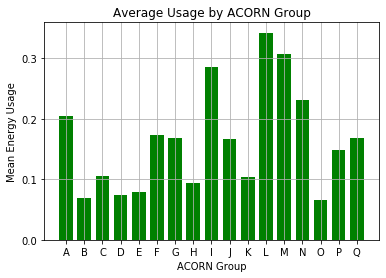

In [431]:
N = 17
i = 0
means = []
for group in groups:
    means.append(groups[group]['daily']['energy_mean'].mean())
ind = np.arange(N)    # the x locations for the groups
width = 0.75       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, means, width, color = 'green')


plt.ylabel('Mean Energy Usage')
plt.xlabel('ACORN Group')
plt.title('Average Usage by ACORN Group')
plt.grid(zorder=0)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M','N','O','P','Q'))
plt.yticks(np.arange(0, .40, .1))

plt.show()

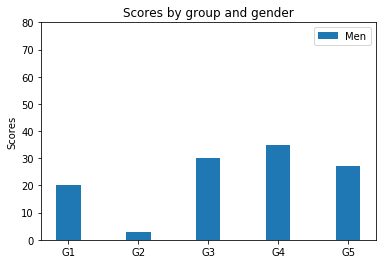

In [346]:
N = 5
menMeans = (20, 3, 30, 35, 27)
menStd = (2, 3, 4, 1, 2)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)


plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0],), ('Men',))

plt.show()

In [108]:
df3 = pd.read_csv('/vol_fast/ecen489/smart-meters-in-london/acorn_details.csv',encoding = "ISO-8859-1")

In [96]:
df3

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,LEISURE TIME,Holiday Destination/Type,Asia,171.0,137.0,94.0,220.0,196.0,69.0,122.0,95.0,72.0,97.0,124.0,73.0,57.0,49.0,96.0,113.0,63.0
822,LEISURE TIME,Holiday Destination/Type,Activity / Outdoor Sports,298.0,278.0,138.0,119.0,93.0,96.0,113.0,96.0,84.0,96.0,56.0,48.0,48.0,46.0,23.0,23.0,23.0
823,LEISURE TIME,Holiday Destination/Type,Cruise,272.0,295.0,272.0,44.0,44.0,70.0,70.0,70.0,70.0,70.0,28.0,28.0,28.0,28.0,49.0,49.0,49.0
824,LEISURE TIME,Holiday Destination/Type,Package,196.0,186.0,166.0,49.0,49.0,101.0,101.0,121.0,106.0,101.0,48.0,75.0,75.0,75.0,54.0,54.0,54.0


In [97]:
df4 = pd.read_csv('/vol_fast/ecen489/smart-meters-in-london/uk_bank_holidays.csv')

In [98]:
df4

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)
5,2012-07-05,Early May bank holiday
6,2012-09-04,Easter Monday
7,2012-06-04,Good Friday
8,2012-02-01,New Year?s Day (substitute day)
9,2013-12-26,Boxing Day


In [99]:
df5 = pd.read_csv('/vol_fast/ecen489/smart-meters-in-london/weather_hourly_darksky.csv')

In [100]:
df5

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy
...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear


In [101]:
df6 = pd.read_csv('/vol_fast/ecen489/smart-meters-in-london/weather_daily_darksky.csv')

In [102]:
df6

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,9.03,2014-01-26 16:00:00,233,partly-cloudy-day,2.39,2014-01-26 21:00:00,0.40,4.55,1002.10,2014-01-26 22:00:00,...,9.03,2014-01-26 07:48:49,2014-01-26 16:00:00,2014-01-26 11:00:00,Mostly cloudy until evening.,2014-01-27 05:00:00,-1.30,2014-01-26 15:00:00,2014-01-27 04:00:00,0.84
878,10.31,2014-02-27 14:00:00,224,partly-cloudy-day,3.08,2014-02-27 23:00:00,0.32,4.14,1007.02,2014-02-27 22:00:00,...,10.31,2014-02-27 06:51:45,2014-02-27 14:00:00,2014-02-27 12:00:00,Partly cloudy until evening.,2014-02-28 02:00:00,1.41,2014-02-27 14:00:00,2014-02-28 02:00:00,0.93
879,18.97,2014-03-09 14:00:00,172,partly-cloudy-night,4.30,2014-03-09 07:00:00,0.04,2.78,1022.44,2014-03-09 07:00:00,...,18.97,2014-03-09 06:29:49,2014-03-09 14:00:00,2014-03-09 12:00:00,Partly cloudy in the evening.,2014-03-10 05:00:00,7.08,2014-03-09 14:00:00,2014-03-10 06:00:00,0.28
880,8.83,2014-02-12 16:00:00,210,wind,1.94,2014-02-12 01:00:00,0.59,7.24,994.27,2014-02-12 01:00:00,...,8.83,2014-02-12 07:21:44,2014-02-12 16:00:00,2014-02-12 10:00:00,Mostly cloudy until evening and breezy through...,2014-02-13 05:00:00,-1.20,2014-02-12 16:00:00,2014-02-13 02:00:00,0.42


Now that my data is loaded. Question: Who uses the least amount of power and what provider are they using? Is it consistent for good weather days and are the areas near each other?